In [1]:
import os
import numpy as np
import mne

In [2]:

"""Sample Data with Download (1.65GB)"""

#sample_data_folder = mne.datasets.sample.data_path()
#sample_data_raw_file = os.path.join(sample_data_folder, 'MEG', 'sample',
#'sample_audvis_filt-0-40_raw.fif')

#raw = mne.io.read_raw_fif(sample_data_raw_file)

"""OR Use from file"""
raw = mne.io.read_raw_eeglab('/Users/viniciussilvestrelourenco/Desktop/eegexperiment/sub-001/eeg/sub-001_task-Experiment_eeg.set', preload=True)



Reading /Users/viniciussilvestrelourenco/Desktop/eegexperiment/sub-001/eeg/sub-001_task-Experiment_eeg.fdt
Reading 0 ... 867325  =      0.000 ...  3387.988 secs...


In [3]:
"""Infos about the RAW file"""

print(raw)
print(raw.info)

<RawEEGLAB | sub-001_task-Experiment_eeg.fdt, 32 x 867326 (3388.0 s), ~211.8 MB, data loaded>
<Info | 8 non-empty values
 bads: []
 ch_names: FP1, FPZ, FP2, F7, F3, FZ, F4, F8, FC5, FC1, FC2, FC6, M1, T7, ...
 chs: 32 EEG
 custom_ref_applied: False
 dig: 32 items (32 EEG)
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 32
 projs: []
 sfreq: 256.0 Hz
>


Effective window size : 8.000 (s)


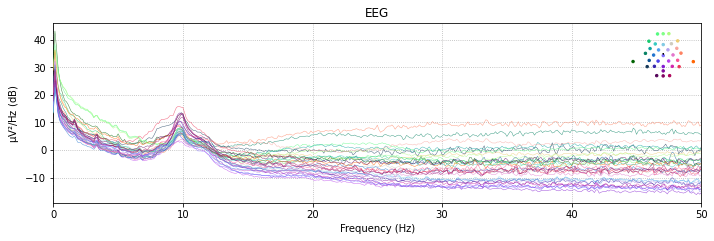

Using matplotlib as 2D backend.


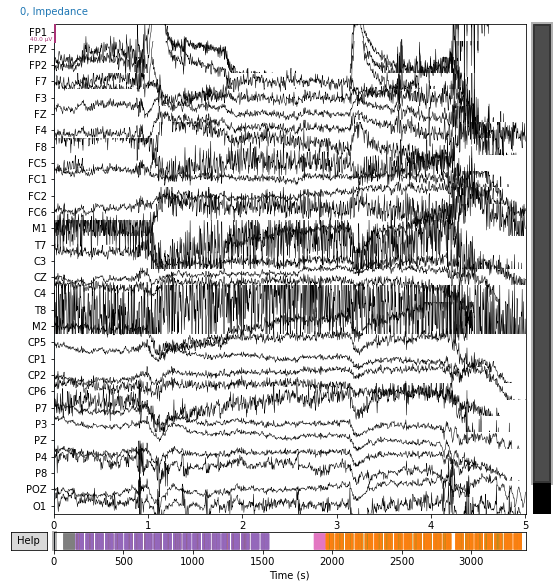

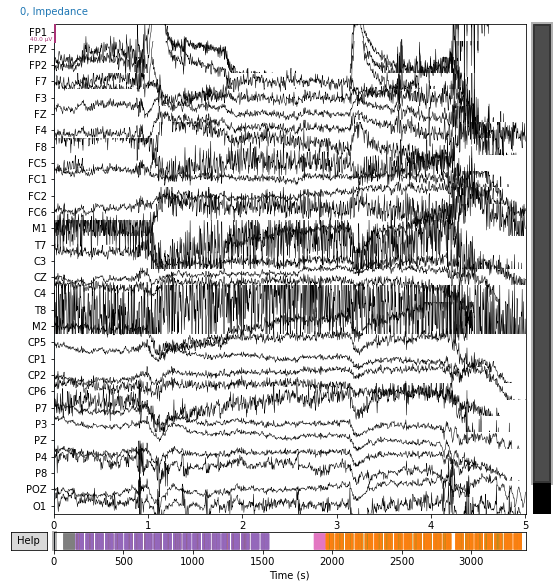

In [4]:
raw.plot_psd(fmax=50)
raw.plot(duration=5, n_channels=30)

Fitting ICA to data using 32 channels (please be patient, this may take a while)


<ipython-input-5-73f37a9f832a>:4: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 20 components
Fitting ICA took 12.4s.
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
Not setting metadata
1693 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
1693 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


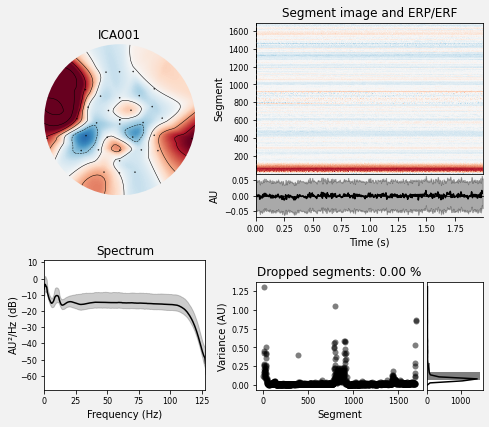

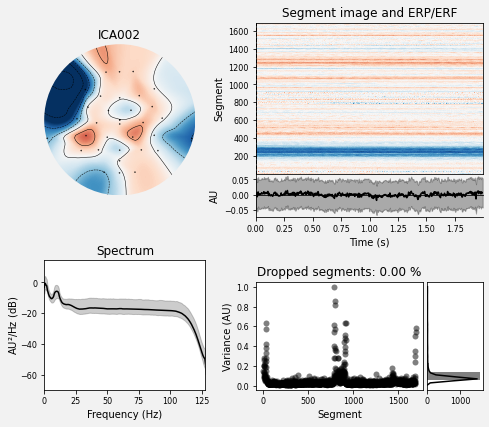

[<Figure size 504x432 with 6 Axes>, <Figure size 504x432 with 6 Axes>]

In [5]:
"""PreProcessing"""
# set up and fit the ICA
ica = mne.preprocessing.ICA(n_components=20, random_state=97, max_iter=800)
ica.fit(raw)
ica.exclude = [1, 2]  # details on how we picked these are omitted here
ica.plot_properties(raw, picks=ica.exclude)

In [6]:
events = mne.find_events(raw, stim_channel ="FC5")
print(events[:5])  # show the first 5

[]


In [7]:
event_dict = {'auditory/left': 1, 'auditory/right': 2, 'visual/left': 3,
              'visual/right': 4, 'smiley': 5, 'buttonpress': 32}

In [8]:
fig = mne.viz.plot_events(events, event_id=event_dict, sfreq=raw.info['sfreq'],
                          first_samp=raw.first_samp)

ValueError: No events in events array, cannot plot.

In [9]:
"""Epoching continuous data"""
reject_criteria = dict(mag=4000e-15,     # 4000 fT
                       grad=4000e-13,    # 4000 fT/cm
                       eeg=150e-6,       # 150 µV
                       eog=250e-6)       # 250 µV

In [10]:
epochs = mne.Epochs(raw, events, event_id=event_dict, tmin=-0.2, tmax=0.5,
                    reject=reject_criteria, preload=True)

ValueError: zero-size array to reduction operation maximum which has no identity